In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
data = pd.read_csv('OnlineNewsPopularity.csv')
data.head(10)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [62]:
data.dtypes

url                              object
timedelta                       float64
n_tokens_title                  float64
n_tokens_content                float64
n_unique_tokens                 float64
                                 ...   
title_subjectivity              float64
title_sentiment_polarity        float64
abs_title_subjectivity          float64
abs_title_sentiment_polarity    float64
shares                            int64
Length: 61, dtype: object

In [63]:
x = data.iloc[:,[-1,2]].values
x

array([[ 593.,   12.],
       [ 711.,    9.],
       [1500.,    9.],
       ...,
       [1900.,   10.],
       [1100.,    6.],
       [1300.,   10.]])

In [64]:
data['num_hrefs'] = data['num_hrefs'].astype(int)

In [65]:
y = data.iloc[:,7].values
y

array([ 4,  3,  3, ..., 24, 10,  1])

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 0)

In [67]:
print(y_test)

[16  7  6 ... 18 16  4]


In [68]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

C:\Users\ARAVINTH1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.08636868126324286


In [70]:
data = pd.DataFrame({'Actual': y_test,'Predicted':y_pred})
data

,Actual,Predicted
0,16,5
1,7,5
2,6,5
3,31,5
4,8,5
...,...,...
9906,27,5
9907,5,5
9908,18,5
9909,16,5


In [71]:
def Check(data):
    if data['Actual']==data['Predicted']:
        return "True"
    else:
        return "False"
data['Matching'] = data.apply(Check,axis=1)
data

,Actual,Predicted,Matching
0,16,5,False
1,7,5,False
2,6,5,False
3,31,5,False
4,8,5,False
...,...,...,...
9906,27,5,False
9907,5,5,True
9908,18,5,False
9909,16,5,False


C:\Users\ARAVINTH1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


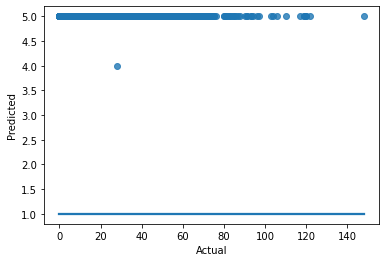

In [77]:
x = data["Actual"]
y = data["Predicted"]
sns.regplot(x,y,logistic=True,ci=None)
plt.show()